In [194]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [195]:
#load the datasets
df = pd.read_csv("new_insurance_data (1).csv")

In [196]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [197]:
df.shape # give the shape of the data (number of rows and columns)

(1338, 13)

In [198]:
df.info() # giving the iformation about the data EX : Dtype and also tell the no of null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [199]:
df.isnull().sum() # checking the null value present in the data or not 

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [200]:
df.duplicated().sum() # checking the duplicate value 

np.int64(0)

In [201]:
def Remove_nullvalue(data):## clean the null values 
    
    cols_to_clean = [] ## make the empty list
    for i in data.columns: # looping on the columns of the data
        Null_precentage = round(data[i].isnull().sum()/len(data)*100,2) ## extracting the null precentage in each columns 
        if Null_precentage<=30.00: # codition when the columns have the less than 30 % of null value 
            cols_to_clean.append(i) # append the columns in which null value is less than 30%   
    data = data.dropna(subset =cols_to_clean) # droping the null values from the data
    
    return data

In [202]:
df = Remove_nullvalue(df)

In [203]:
df.isnull().sum() # checking again null value are still presente in the data 

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

## EDA

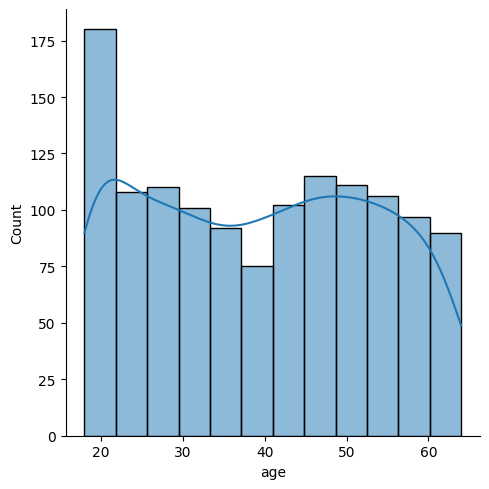

In [204]:
sns.displot(df['age'],kde = True) ## checkin the distribution of the data

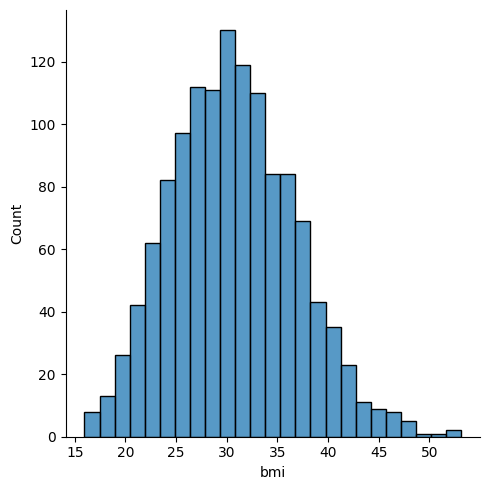

In [205]:
sns.displot(df['bmi'])

In [206]:
def distribution(data):  # Plotting the distribution plot for all numeric columns
    for i in data.columns:  # Looping over all columns
        if data[i].dtype in ['int64', 'float64']:  # Apply only to numeric columns
            sns.displot(data[i], kde=True)  # Plot distribution + KDE
            plt.title(f'Distribution of {i}')  # Title for the plot
            plt.xlabel(i)  # X-axis label
            plt.ylabel('Frequency')  # Y-axis label
            plt.show()  # Show plot

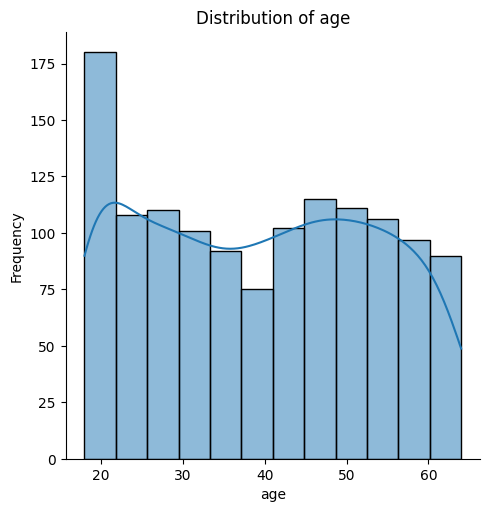

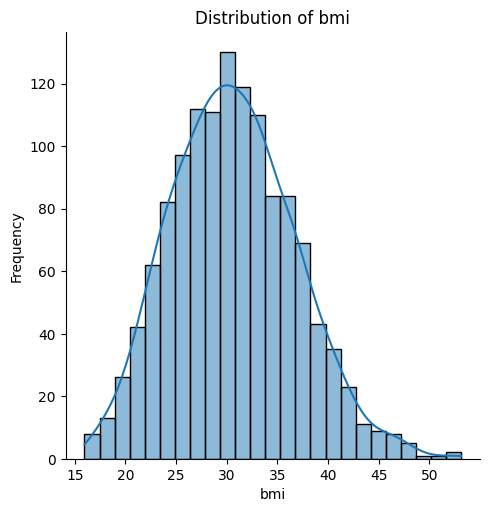

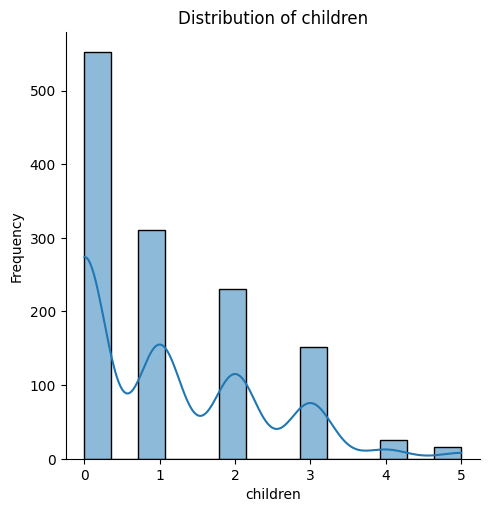

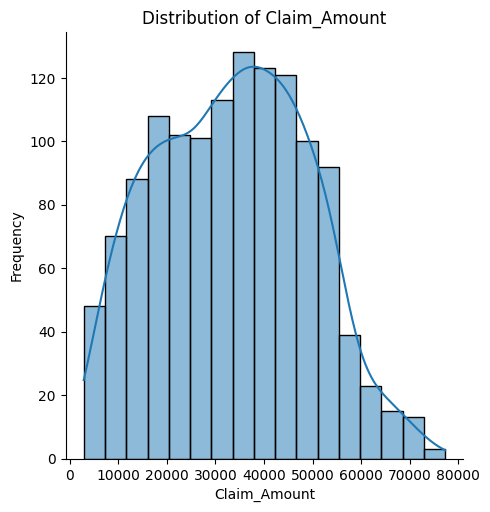

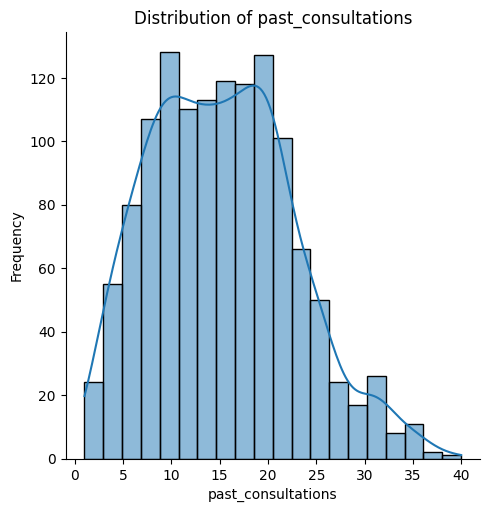

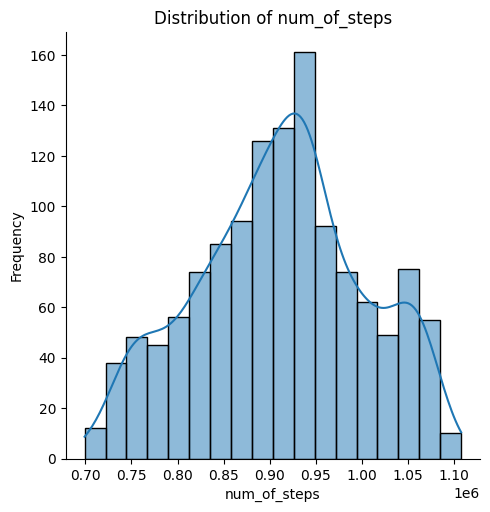

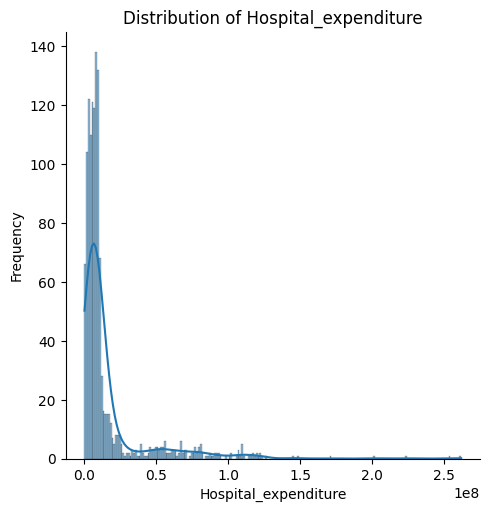

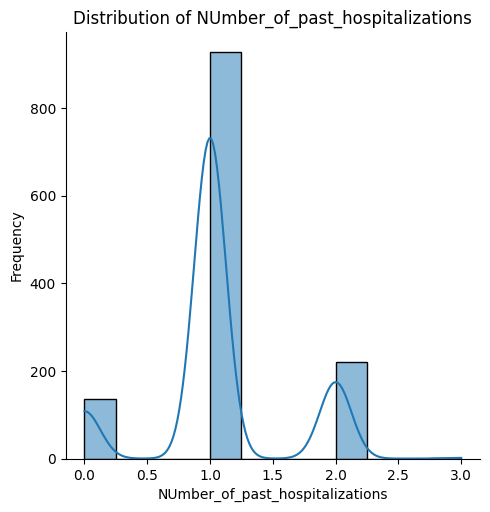

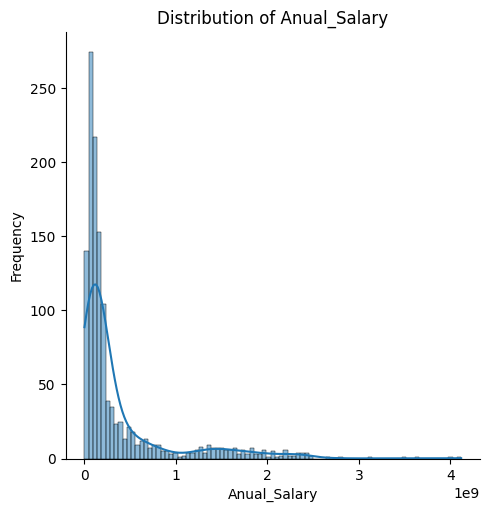

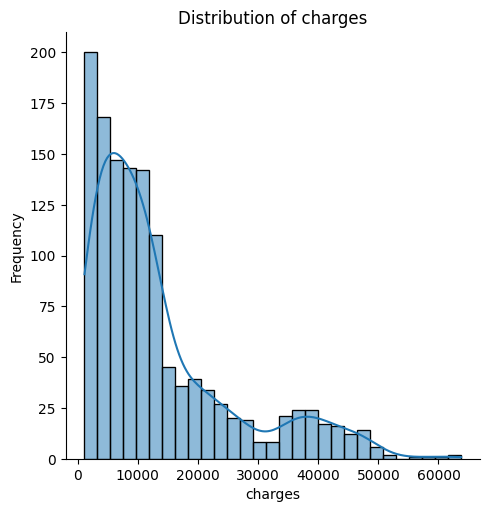

None


In [207]:
ploting = distribution(df)
print(ploting)

In [208]:
## as i saw the all the columns distribution in this i oobserve that some columns have the skewness 

In [209]:
for i in df.columns:  # Looping over all columns
    if df[i].dtype in ['int64', 'float64']:  # Check if the column is numeric
        skew_value = df[i].skew()  # Calculate skewness for the column
        print(f"Skewness of {i}: {skew_value}")
       

Skewness of age: 0.03889441249345077
Skewness of bmi: 0.304406762124439
Skewness of children: 0.9237358633484137
Skewness of Claim_Amount: 0.09838882204441912
Skewness of past_consultations: 0.39481794056821434
Skewness of num_of_steps: -0.08820786596130657
Skewness of Hospital_expenditure: 3.8197100762202987
Skewness of NUmber_of_past_hospitalizations: 0.13538845298840058
Skewness of Anual_Salary: 2.622524412370251
Skewness of charges: 1.508443204745413


count of male and femals : sex
female    648
male      639
Name: count, dtype: int64


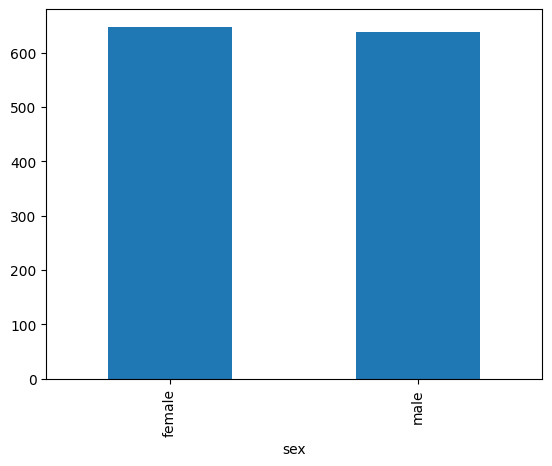

In [210]:
df['sex'].value_counts().plot(kind = 'bar') ## count the number of male and female and plot them using bar graph
print(f"count of male and femals : {df['sex'].value_counts()}") # get the nummber of male and female

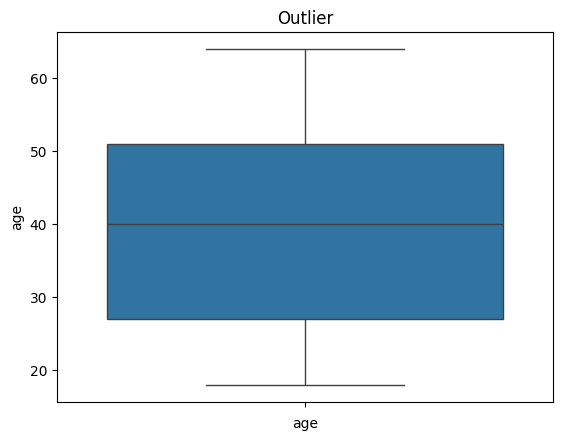

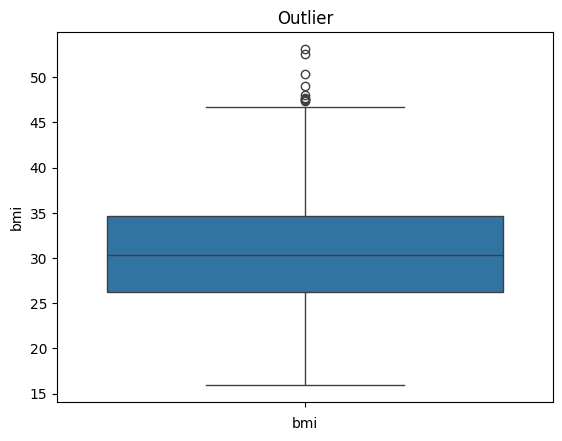

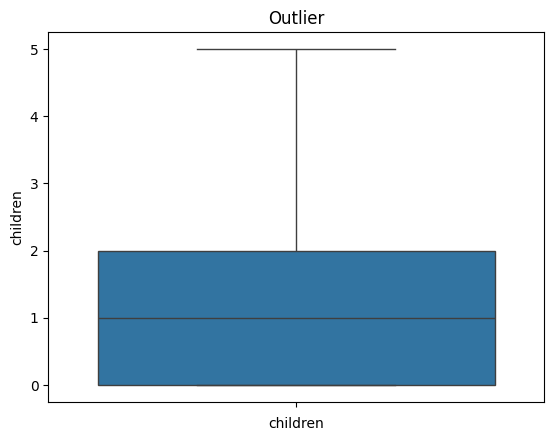

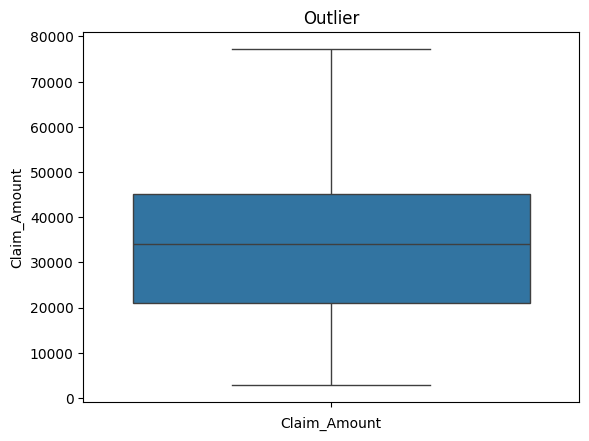

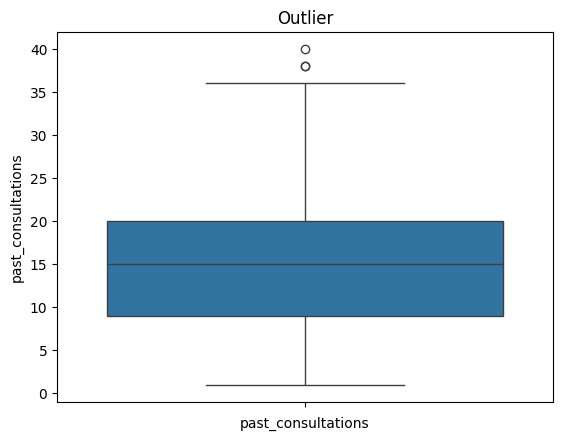

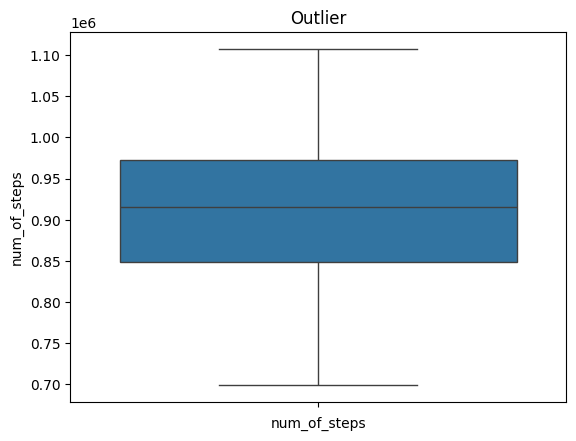

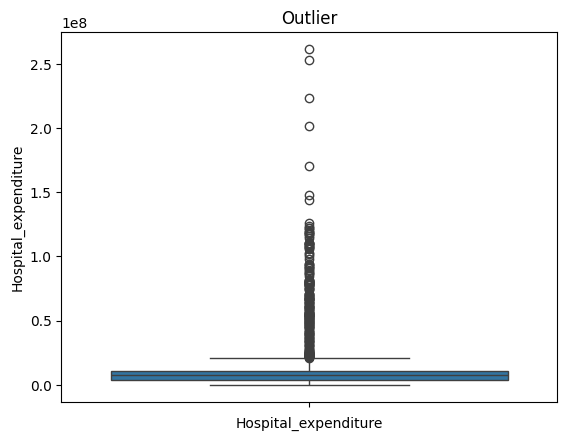

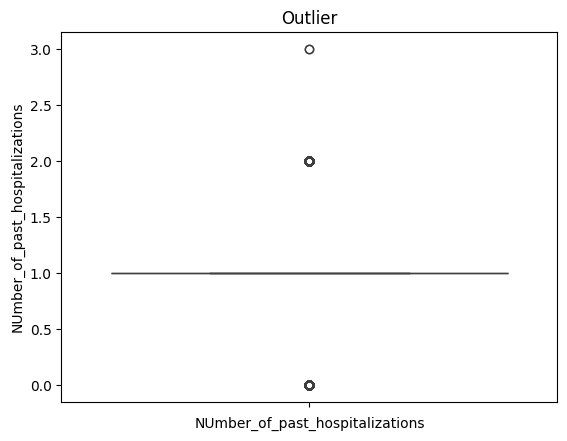

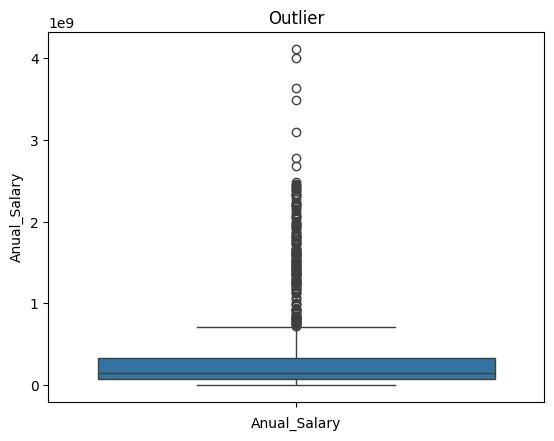

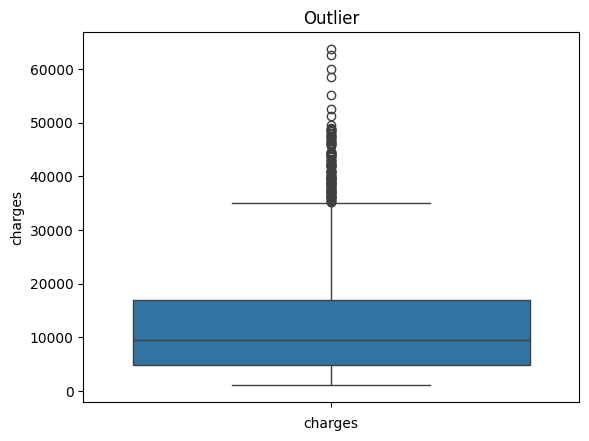

In [211]:
### check the Outlier the dataset 
def find_outlier(data): 
    for col in data.columns: ## looping over the columns of the data
        if data[col].dtype in ['int','float']: ## include only integer and float columns 
            sns.boxplot(data[col]) ## plot the graph for find the outlier
            plt.title('Outlier')
            plt.xlabel(col)
            plt.show()
outlier = find_outlier(df)

<Axes: xlabel='Anual_Salary', ylabel='charges'>

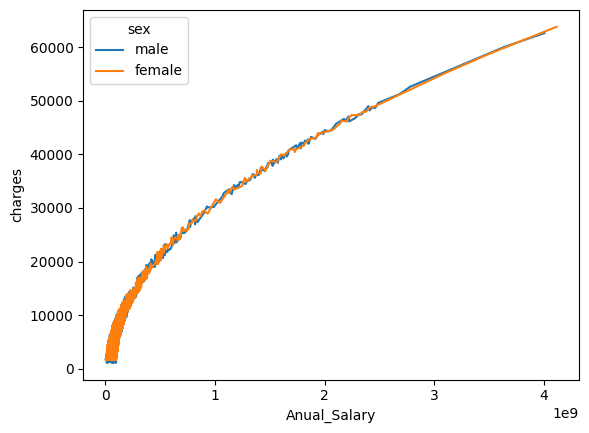

In [212]:
sns.lineplot(x = df['Anual_Salary'],y = df['charges'],hue = df['sex'])

Avarage_salaey of male and female :       sex  Anual_Salary
0  female  3.317245e+08
1    male  4.144484e+08 



<Axes: xlabel='sex', ylabel='Anual_Salary'>

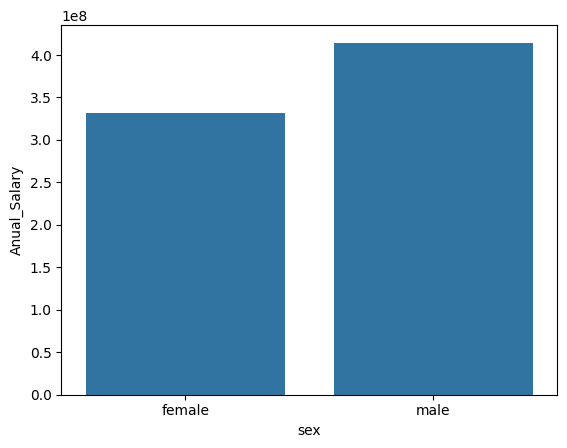

In [213]:
# finding the avargae salary of male and female 
avarage_salary = df.groupby(['sex'])['Anual_Salary'].mean().reset_index() ##  checking the avarage Anual_salary gender vise
print(f'Avarage_salaey of male and female : {avarage_salary}',"\n") 


sns.barplot(x = avarage_salary['sex'],y = avarage_salary['Anual_Salary'])## plot the graph 

Smoker count : smoker
no     1023
yes     264
Name: count, dtype: int64 



<Axes: xlabel='smoker'>

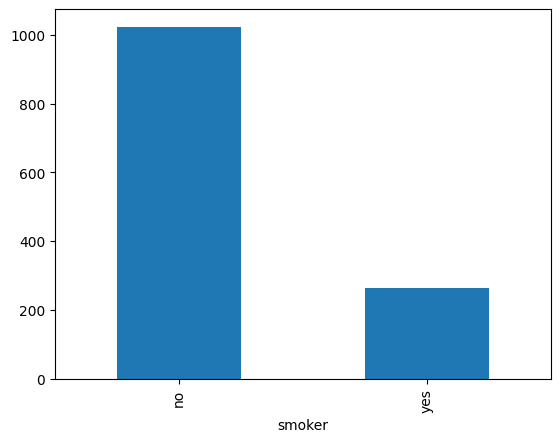

In [214]:
## smoker and non smoker
smoker_count = df['smoker'].value_counts() ## number of the smoker and non smoker
print(f"Smoker count : {smoker_count}",'\n')

df['smoker'].value_counts().plot(kind = 'bar') ## smoker 

,smoker,sex,age
0,no,female,39.723881
1,no,male,39.689938
2,yes,female,38.410714
3,yes,male,38.223684


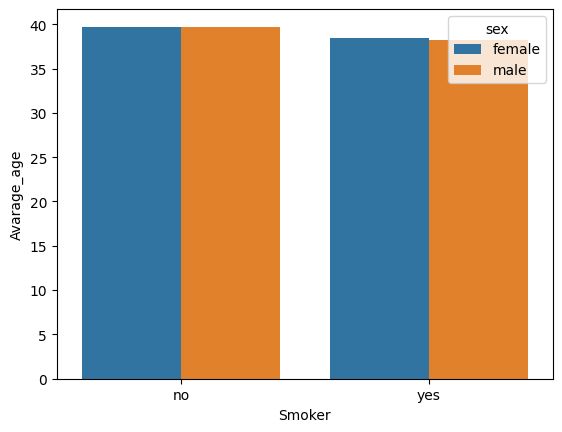

In [215]:
## average_age of smoker
df.head()
avarage_smoker_age = df.groupby(['smoker','sex'])['age'].mean().reset_index() # avarage age of smoker and not smoker
sns.barplot(data = avarage_smoker_age,x = 'smoker',y = 'age',hue = 'sex')# plot the graph for better understanding
plt.ylabel('Avarage_age')
plt.xlabel('Smoker')
avarage_smoker_age

In [216]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [217]:
# Function to extract outliers from all numeric columns using IQR
def remove_outliers(data):
    clean_data= data.copy()
    for col in data.columns:  # Looping over columns
        if data[col].dtype in ['int64', 'float64']:  # Work only on numerical columns
            # Outlier Detection Using IQR
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            clean_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        
    return clean_data # Remove duplicate rows appearing in multiple columns

In [218]:
df_clean = remove_outlier(df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'age'),
  Text(1, 0, 'bmi'),
  Text(2, 0, 'children'),
  Text(3, 0, 'Claim_Amount'),
  Text(4, 0, 'past_consultations'),
  Text(5, 0, 'num_of_steps'),
  Text(6, 0, 'Hospital_expenditure'),
  Text(7, 0, 'NUmber_of_past_hospitalizations'),
  Text(8, 0, 'Anual_Salary'),
  Text(9, 0, 'charges')])

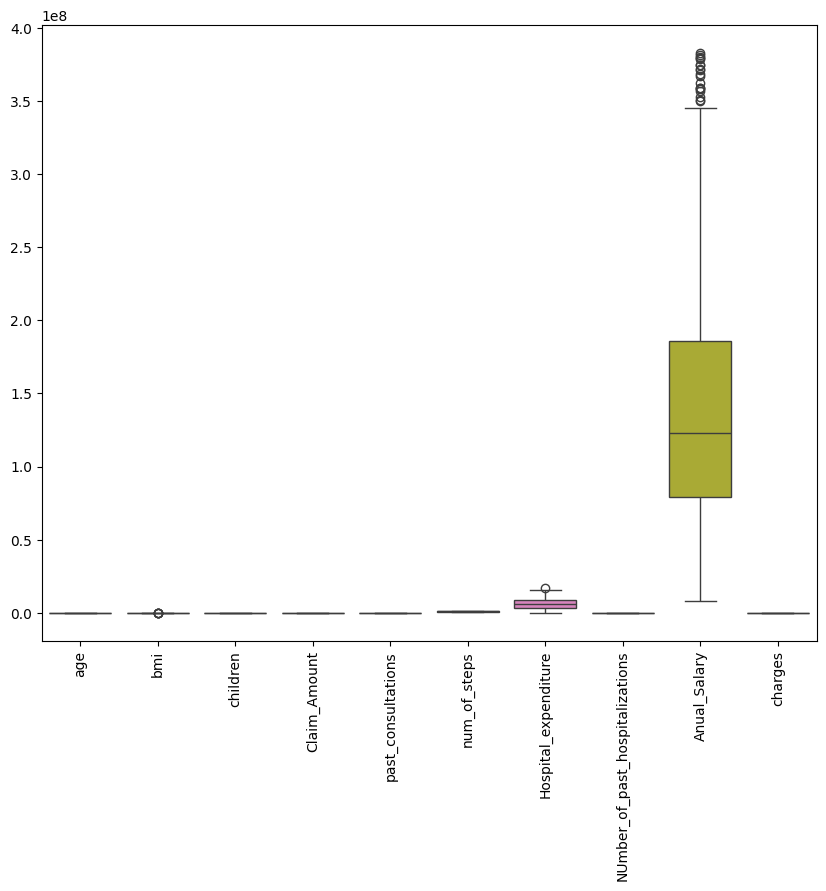

In [219]:
plt.figure(figsize=(10,8))
sns.boxplot(df_clean)
plt.xticks(rotation=90)

In [220]:
## Encoding 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [223]:
encoding  = OneHotEncoder(drop='first',sparse_output=False) ## Encoding convert the object data into number 
df_clean['sex'] = encodeing.fit_transform(df_clean[['sex']]) ## apply on sex column
df_clean['smoker']= encodeing.fit_transform(df_clean[['smoker']])# apply on smoker column
df_clean['region'] = encodeing.fit_transform(df_clean[['region']]) ## apply on region column

In [225]:
## Spliting the data 
X = df_clean.drop(columns='charges')
y = df_clean['charges']

In [226]:
print(f'X  : {X.shape}')
print(f'y  : {y.shape}')

X  : (851, 12)
y  : (851,)


In [227]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [230]:
LR = LinearRegression()
Tree = DecisionTreeRegressor(max_depth=5,random_state=42)
Randome = RandomForestRegressor(max_depth = 5)

In [236]:
LR.fit(X_train,y_train)
Tree.fit(X_train,y_train)
Randome.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

In [240]:
Y_prediction_LR = LR.predict(X_test)
y_predict_tree = Tree.predict(X_test)
y_predict_randome = Randome.predict(X_test)


In [244]:
from sklearn.metrics import r2_score
r2 = r2_score

In [243]:
print(f" LineraRegreesion Accuracy :{r2_score(y_test,Y_prediction_LR)}")
print(f" DecisionTree Accuracy :{r2_score(y_test,y_predict_tree)}")
print(f" RandomeForest Accuracy :{r2_score(y_test,y_predict_randome)}")

 LineraRegreesion Accuracy :0.9583343647943856
 DecisionTree Accuracy :0.9718990463594009
 RandomeForest Accuracy :0.9802992849285675


In [253]:
from sklearn.model_selection import cross_val_score

cross = cross_val_score(Randome,X_train,y_train,cv = 10,scoring=  'r2')
print("R² Scores for each fold:", cross)
print("Average R² Score:", cross.mean())


R² Scores for each fold: [0.97611172 0.98340138 0.98054494 0.97672319 0.97859639 0.97961398
 0.97806376 0.97465398 0.98587368 0.98034824]
Average R² Score: 0.9793931256174642


In [257]:
from sklearn.model_selection import RandomizedSearchCV ## Hyperperameter Tunning usnig RandomizedSearchCV
para_grid = {'n_estimators':[100,200,300],'max_depth':[None,10,20], ## parameter 
           'min_samples_split':[2,5]}

randome_cv  = RandomizedSearchCV(estimator=Randome,param_distributions  =para_grid,cv=5,scoring = 'r2',n_jobs=-1 ) 

In [259]:
randome_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=5),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='r2')

In [260]:
randome_cv.best_params_


{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}

In [261]:
randome_cv.best_score_

np.float64(0.982098467969436)

##***After evaluating three different algorithms, I have selected the RandomForestRegressor as the final model based on its superior performance in terms of R² score and generalization capability.***